In [104]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVR
import seaborn as sns
import numpy as np

In [126]:
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


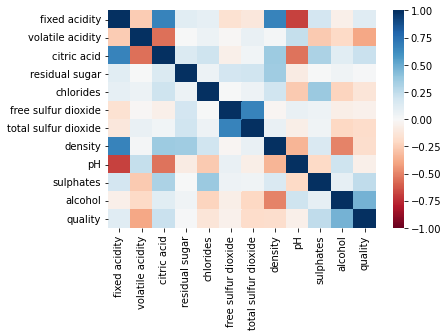

In [30]:
corr_map=df.corr()
sns.heatmap(corr_map, vmax=1, vmin=-1, cmap='RdBu')

In [127]:
#Remove outlier
for col in df.columns:
  q75, q25 = np.percentile(df[col], [75 ,25])
  iqr = q75 - q25
  df=df[df[col].between(q25-1.5*iqr, q75+1.5*iqr)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [140]:
#Linear Regression
x_train, x_test, y_train, y_test=train_test_split(df.drop(columns='quality'), 
                                                  df['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

md=LinearRegression()
md.fit(x_train, y_train)
prediction=md.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.4107464531699556
MSE score: 0.29135442782308474
Accuracy score: 0.6512455516014235


In [141]:
#Linear Regression with selected features
selected_feature=corr_map.loc[corr_map['quality'] > 0.1, 'quality'].index[:-1]
selected_feature

x_train, x_test, y_train, y_test=train_test_split(df[selected_feature], 
                                                  df['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

md=LinearRegression()
md.fit(x_train, y_train)
prediction=md.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.4122335007157204
MSE score: 0.2906191621820499
Accuracy score: 0.6370106761565836


In [142]:
#Ridge Regression
x_train, x_test, y_train, y_test=train_test_split(df.drop(columns='quality'), 
                                                  df['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

md=Ridge()
md.fit(x_train, y_train)
prediction=md.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.40985820238576665
MSE score: 0.2917936204259685
Accuracy score: 0.6512455516014235


In [146]:
#SVR with GridSearchCV
scaler= StandardScaler()
scaled_data=scaler.fit_transform(df.drop(columns='quality'))

x_train, x_test, y_train, y_test=train_test_split(scaled_data, df['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(x_train, y_train)

prediction=clf.best_estimator_.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.3784802826159831
MSE score: 0.30730832697289534
Accuracy score: 0.6583629893238434


In [144]:
#KNN
scaler= StandardScaler()
scaled_data=scaler.fit_transform(df.drop(columns='quality'))

x_train, x_test, y_train, y_test=train_test_split(scaled_data, df['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

md=KNeighborsRegressor()
md.fit(x_train, y_train)
prediction=md.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.3315076071922546
MSE score: 0.33053380782918146
Accuracy score: 0.604982206405694
